In [1]:
import pickle
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Metrics:

Cross Entropy

Accuracy

AUC-ROC?


## Loading in the Data:

In [2]:
files = ["data_batch_1", "data_batch_2", "data_batch_3", "data_batch_4", "data_batch_5", "test_batch"]
dir = "cifar-10-batches-py/"

# Loading the data into a single numpy array:
for file in files:
    with open(dir + file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        if file == "data_batch_1":
            data = dict[b'data']
            labels = dict[b'labels']
        else:
            data = np.vstack((data, dict[b'data']))
            labels = np.hstack((labels, dict[b'labels']))



data = data.reshape((data.shape[0], 3, 32, 32)).transpose(0, 2, 3, 1).astype("int")

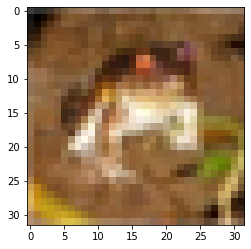

In [3]:
# plot the first image of cifar 10 dataset:
plt.imshow(data[0], interpolation='nearest')

# Splitting the Data:

We will use a stratified train test split. We have enough data, 60,000 images equally split amoungst 10 classes. Therefore, we do not need to use K-fold cross validation or shuffle split in order to properly train and evaluate our models.


In [4]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=69, stratify=labels)

# Modeling

## Data Augmentation 

In [5]:
datagen = ImageDataGenerator()
datagen.fit(X_train)

## Model 1:

In [33]:
input = tf.keras.Input(shape=(32, 32, 3))
normalized_input = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(input)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(normalized_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
dense = tf.keras.layers.Flatten()(x)
dense = tf.keras.layers.Dense(64, activation='relu')(dense)
output = tf.keras.layers.Dense(10, activation='softmax')(dense)
model1 = tf.keras.Model(inputs=input, outputs=output)

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
history1 = model1.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.5193 - accuracy: 0.4571 - val_loss: 1.3507 - val_accuracy: 0.5207
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2232 - accuracy: 0.5704 - val_loss: 1.1951 - val_accuracy: 0.5788
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1118 - accuracy: 0.6126 - val_loss: 1.1195 - val_accuracy: 0.6075
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0282 - accuracy: 0.6435 - val_loss: 1.0767 - val_accuracy: 0.6236
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9691 - accuracy: 0.6627 - val_loss: 1.0731 - val_accuracy: 0.6260
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9211 - accuracy: 0.6801 - val_loss: 1.0414 - val_accuracy: 0.6386
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8803 - accuracy: 0.6919 - val_loss: 1.0817 - val_accuracy:

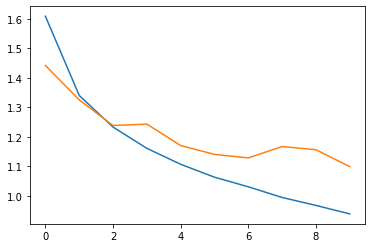

In [26]:
# plot the accuracy and loss of the model:

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])


## Model 2:

In [9]:
input = tf.keras.Input(shape=(32, 32, 3))
normalized_input = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(input)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(normalized_input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu')(x)

dense = tf.keras.layers.Flatten()(x)
dense = tf.keras.layers.Dense(64, activation='relu')(dense)
output = tf.keras.layers.Dense(10, activation='softmax')(dense)

model2 = tf.keras.Model(inputs=input, outputs=output)

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history2 = model2.fit(datagen.flow(X_train, y_train, batch_size=16), epochs=50, validation_data=(X_val, y_val))


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_11 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        18496     
                                                           

In [ ]:
model2.save('model2.h5')

Text(0.5, 1.0, 'Loss over epochs')

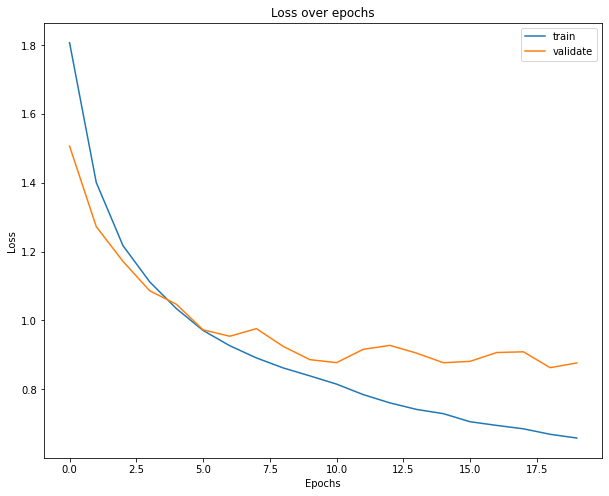

In [52]:
# plot history of the model:
fig = plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validate')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')

## Model 3:


In [24]:
from tensorflow.keras.regularizers import l2

input = tf.keras.Input(shape=(32, 32, 3))
normalized_input = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(input)

x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(.0001))(normalized_input)
x = tf.keras.layers.BatchNormalization()(x)
x_save = tf.keras.layers.Dropout(0.4)(x)

# 1st block
x = tf.keras.layers.Conv2D(64, (1, 1), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(.0001))(x_save)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(.0001))(x)
x = tf.keras.layers.Conv2D(256, (1, 1), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(.0001))(x)

# Adding two layers
x_save = tf.keras.layers.Add()([x, x_save])

# 2nd block
x = tf.keras.layers.Conv2D(64, (1, 1), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(.0001))(x_save)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(.0001))(x)
x = tf.keras.layers.Conv2D(256, (1, 1), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(.0001))(x)

# Adding two layers
x = tf.keras.layers.Add()([x, x_save])

# Max pooling
max_pool = tf.keras.layers.MaxPooling2D((2, 2))(x_save)

# dense layers
dense = tf.keras.layers.Flatten()(max_pool)
dense = tf.keras.layers.Dense(64, activation='relu')(dense)
output = tf.keras.layers.Dense(10, activation='softmax')(dense)

model3 = tf.keras.Model(inputs=input, outputs=output)

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model3.summary()






Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_11 (Rescaling)       (None, 32, 32, 3)    0           ['input_12[0][0]']               
                                                                                                  
 conv2d_72 (Conv2D)             (None, 32, 32, 256)  7168        ['rescaling_11[0][0]']           
                                                                                                  
 batch_normalization_50 (BatchN  (None, 32, 32, 256)  1024       ['conv2d_72[0][0]']              
 ormalization)                                                                              

In [25]:
# Train the model

history3 = model3.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
1099/1500 [====================>.........] - ETA: 7s - loss: 3.0419 - accuracy: 0.2100

KeyboardInterrupt: 

In [ ]:
model3.save('model3.h5')